In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("sales_dataset[1].csv")

<ipython-input-1-3c95fa8d591b>:3: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sales_dataset[1].csv")


# **Step 1: Data cleaning**

In [2]:
df.loc[df['Status'].str.contains('Cancelled',case=False, na=False), 'Amount'] = 0
valid_median = df.loc[(df['Amount'] != 0) & (df['Amount'].notna()), 'Amount'].median()
print("Updated 'Amount' column with Cancelled = 0 and NA filled with median:", round(valid_median, 2))
print(df[['Status', 'Amount']].head(10))

Updated 'Amount' column with Cancelled = 0 and NA filled with median: 625.0
                         Status  Amount
0                     Cancelled     0.0
1  Shipped - Delivered to Buyer   406.0
2                       Shipped   329.0
3                     Cancelled     0.0
4                       Shipped   574.0
5                       Shipped   824.0
6                       Shipped   653.0
7  Shipped - Delivered to Buyer   399.0
8                     Cancelled     0.0
9                       Shipped   363.0


# **Step 2: Financial Performance**

# **1. Total Revenue**

In [ ]:
total_revenue = df['Amount'].sum()
print("Total Revenue:", round(total_revenue,2))

Total Revenue: 71649053.62


# **2. Top-Selling Products by Quantity**

Top 10 Selling Products by Quantity:
SKU
JNE3797-KR-L       661
JNE3797-KR-M       561
JNE3797-KR-S       503
JNE3405-KR-L       485
J0230-SKD-M        469
J0230-SKD-S        421
JNE3797-KR-XL      416
JNE3405-KR-S       399
JNE3797-KR-XS      386
SET268-KR-NP-XL    373
Name: Qty, dtype: int64


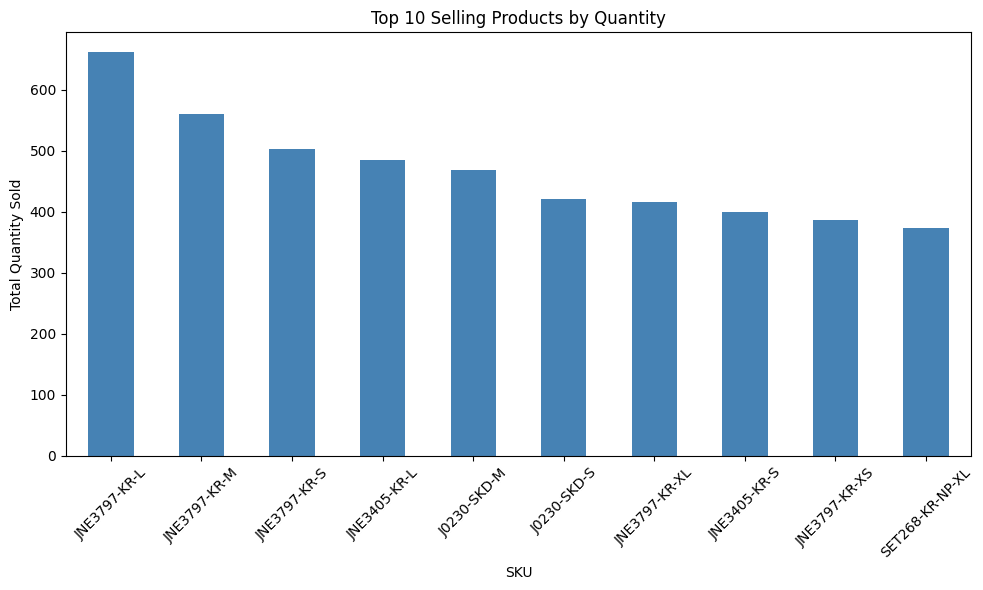

In [10]:
top_selling_products = df.groupby('SKU')['Qty'].sum().sort_values(ascending=False).head(10)
print("Top 10 Selling Products by Quantity:")
print(top_selling_products)
top_selling_products.plot(kind='bar', figsize=(10, 6), title='Top 10 Selling Products by Quantity', color='steelblue')
plt.xlabel('SKU')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **3. Average Order Value (AOV)**

In [11]:
order_totals = df.groupby('Order ID')['Amount'].sum()
average_order_value = order_totals.mean()
print("Average Order Value (AOV):", round(average_order_value,2))

Average Order Value (AOV): 595.33


# **4. Monthly Sales**

Top 4 Peak Sales Months by Revenue (in INR):
Month
2022-04    26227884.62
2022-05    23944303.00
2022-06    21382056.00
2022-03       94810.00
Freq: M, Name: Amount, dtype: float64


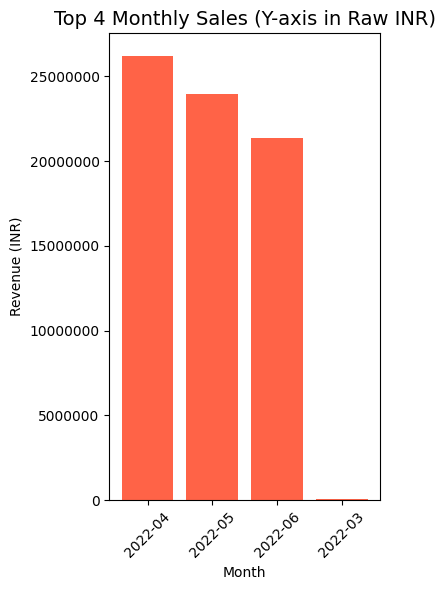

In [12]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()
top_months = monthly_sales.sort_values(ascending=False).head(4)
print("Top 4 Peak Sales Months by Revenue (in INR):")
print(top_months)
plt.figure(figsize=(4, 6))
bars = plt.bar(top_months.index.astype(str), top_months.values, color='tomato')
plt.title("Top 4 Monthly Sales (Y-axis in Raw INR)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# **5. Weekly Sales**

Weekly Sales by Weekday (INR):
Weekday
Monday       10297680.00
Tuesday      10475005.00
Wednesday    10289625.00
Thursday      9477829.00
Friday        9842106.00
Saturday     10281972.62
Sunday       10984836.00
Name: Amount, dtype: float64


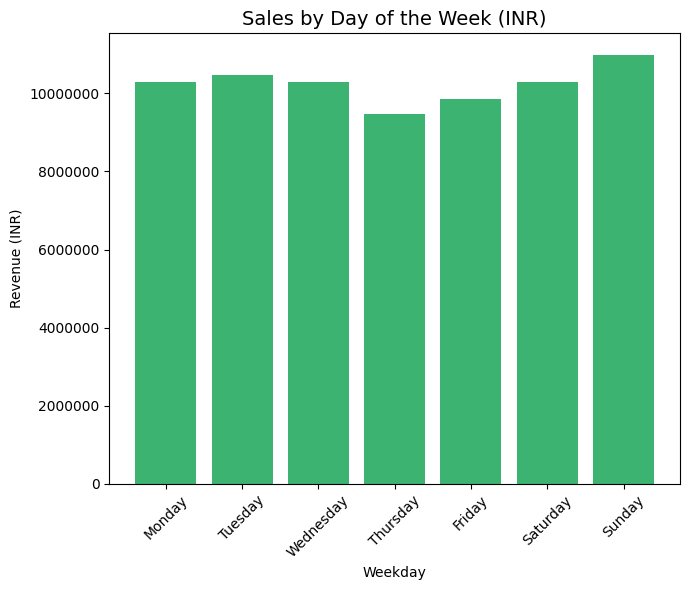

In [13]:
df['Weekday'] = df['Date'].dt.day_name()
weekday_sales = df.groupby('Weekday')['Amount'].sum()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(ordered_days)
print("Weekly Sales by Weekday (INR):")
print(weekday_sales)
plt.figure(figsize=(7, 6))
bars = plt.bar(weekday_sales.index, weekday_sales.values, color='mediumseagreen')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Sales by Day of the Week (INR)", fontsize=14)
plt.xlabel("Weekday")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Step 3: Customer Insights**

# **6. Top Performing Cities by Revenue**

Top 10 Performing Cities by Revenue:
ship-city
BENGALURU    6348623.00
HYDERABAD    4496068.57
MUMBAI       3396134.00
NEW DELHI    3329533.48
CHENNAI      2819250.00
PUNE         2150814.00
KOLKATA      1304023.00
GURUGRAM     1134488.00
THANE         918237.00
LUCKNOW       849936.00
Name: Amount, dtype: float64


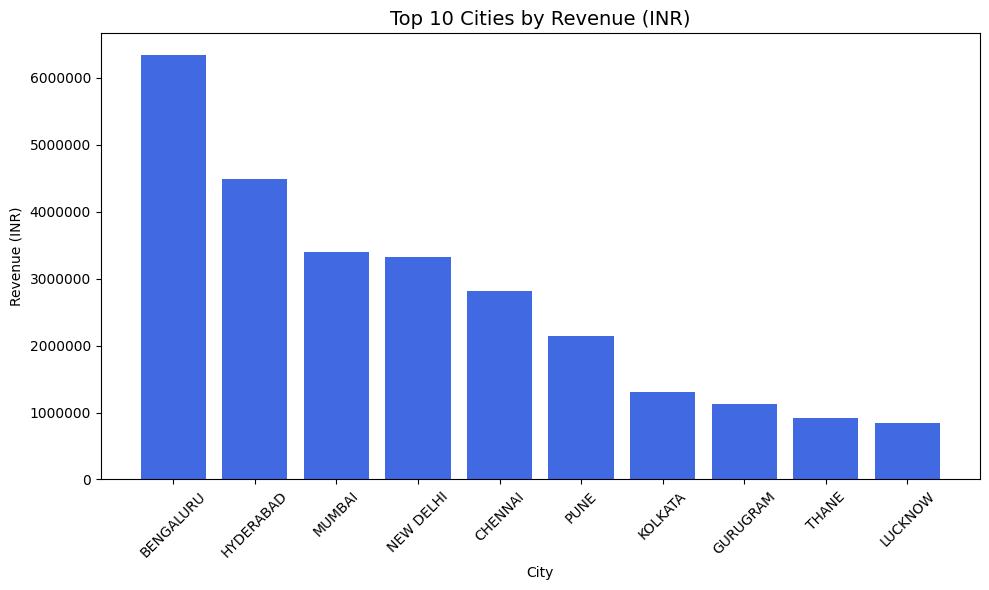

In [14]:
city_revenue = df.groupby('ship-city')['Amount'].sum()
top_cities = city_revenue.sort_values(ascending=False).head(10)
print("Top 10 Performing Cities by Revenue:")
print(top_cities)
top_cities = city_revenue.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_cities.index.astype(str), top_cities.values, color='royalblue')
plt.title("Top 10 Cities by Revenue (INR)", fontsize=14)
plt.xlabel('City')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# **7. Monthly Cancellation Trends**

Monthly Cancellation Trends:
Month
2022-03      18
2022-04    7139
2022-05    5881
2022-06    5303
Freq: M, dtype: int64


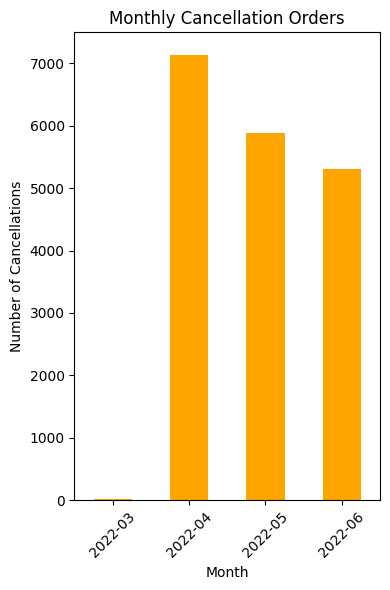

In [15]:
df['Month'] = df['Date'].dt.to_period('M')
cancelled_orders = df[df['Status'].str.contains('Cancelled',case=False, na=False)]
cancellation_trend = cancelled_orders.groupby('Month').size()
print("Monthly Cancellation Trends:")
print(cancellation_trend)
cancellation_trend.plot(kind='bar', figsize=(4, 6), title='Monthly Cancellation Orders', color='orange')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **8. Revenue by B2B vs B2C**

Revenue by Customer Type:
B2C    71089653.62
B2B      559400.00
Name: Amount, dtype: float64


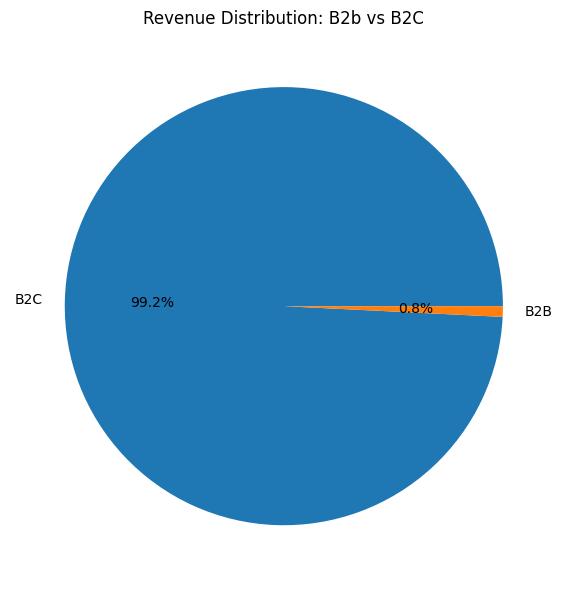

In [16]:
b2b_revenue = df.groupby('B2B')['Amount'].sum()
b2b_revenue.index = ['B2C', 'B2B'] if False in b2b_revenue.index else b2b_revenue.index
print("Revenue by Customer Type:")
print(b2b_revenue)
b2b_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Revenue Distribution: B2b vs B2C')
plt.ylabel('')
plt.tight_layout()
plt.show()

# **Step 4: Logistics and Fulfillment**

# **9. Fulfillment Method Distribution**

Fulfillment Method Distribution (%):
Fulfilment
Amazon      69.5461
Merchant    30.4539
Name: count, dtype: float64


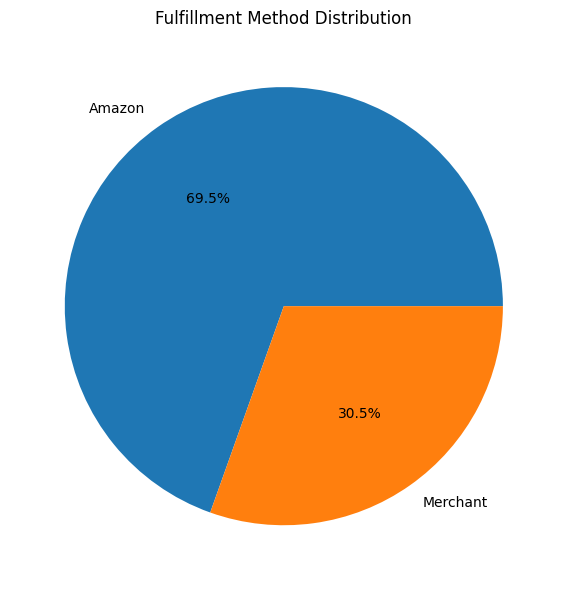

In [17]:
fulfillment_counts = df['Fulfilment'].value_counts(dropna=True)
fulfillment_percentages = (fulfillment_counts / fulfillment_counts.sum()) * 100
print("Fulfillment Method Distribution (%):")
print(fulfillment_percentages)
fulfillment_percentages.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Fulfillment Method Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# **Step 5: Product Management**

# **10. Popular Product Categories**

Top 9 Product Categories by Quantity Ordered:
Category
Set              45288
kurta            45049
Western Dress    13943
Top               9902
Ethnic Dress      1052
Blouse             864
Bottom             398
Saree              152
Dupatta              3
Name: Qty, dtype: int64


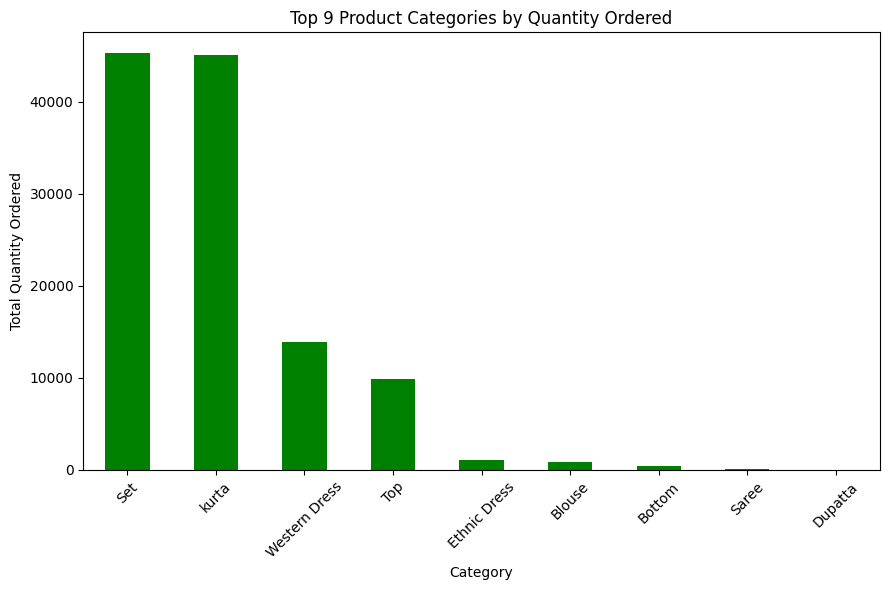

In [18]:
popular_categories = df.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(9)
print("Top 9 Product Categories by Quantity Ordered:")
print(popular_categories)
popular_categories.plot(kind='bar', figsize=(9, 6), title='Top 9 Product Categories by Quantity Ordered', color='green')
plt.xlabel('Category')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **11. Average Quantity Ordered**

In [19]:
average_quantity = df['Qty'].mean()
print("Average Quantity Ordered:", round(average_quantity, 2))

Average Quantity Ordered: 0.9


# **Step 6: Customer Satisfaction and Returns**

# **12. Return & Cancellation Rates**

In [20]:
total_orders = len(df)
return_count = df['Status'].str.contains('Returned',case=False, na=False).sum()
cancel_count = df['Status'].str.contains('Cancelled',case=False, na=False).sum()
return_rate = (return_count / total_orders) * 100
cancellation_rate = (cancel_count / total_orders) * 100
print(f"Return Rate: {return_rate:.2f}%")
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Return Rate: 1.51%
Cancellation Rate: 14.22%


# **13. Problematic Products (Cancelled or Returned)**

Top 10 Problematic Products(Cancellations or Returns):
SKU
JNE3797-KR-L     148
JNE3797-KR-M     122
JNE3797-KR-S     120
JNE3405-KR-L      88
JNE3797-KR-XL     82
JNE3405-KR-M      76
JNE3797-KR-XS     75
J0230-SKD-M       75
J0003-SET-S       73
J0003-SET-M       71
dtype: int64


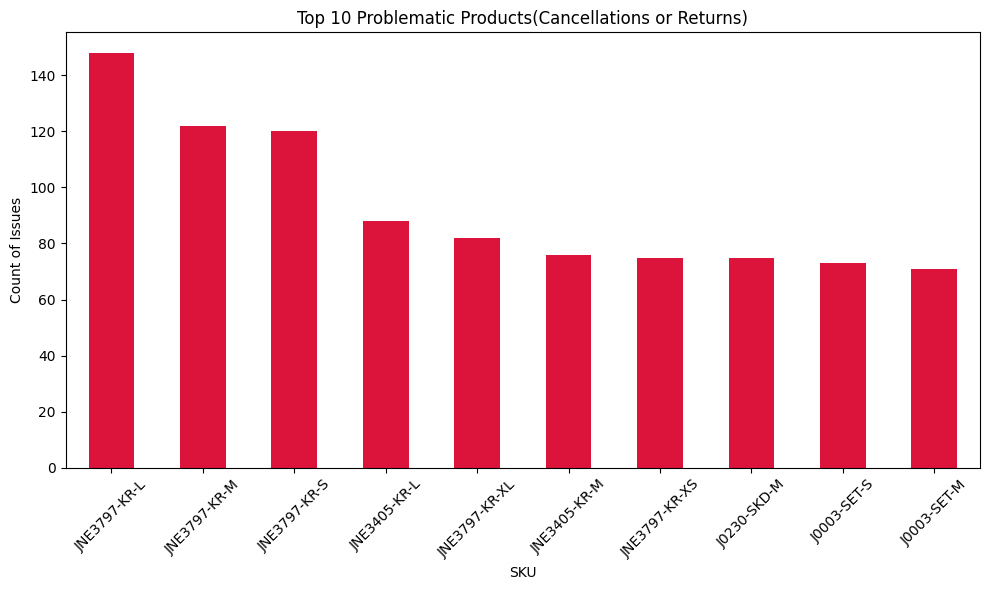

In [21]:
problematic_df = df[df['Status'].str.contains('Cancelled|Returned',case=False, na=False)]
problematic_products = problematic_df.groupby('SKU').size().sort_values(ascending=False).head(10)
print("Top 10 Problematic Products(Cancellations or Returns):")
print(problematic_products)
problematic_products.plot(kind='bar', figsize=(10, 6), title='Top 10 Problematic Products(Cancellations or Returns)', color='crimson')
plt.xlabel('SKU')
plt.ylabel('Count of Issues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Step 7: Conclusion and Recommendations**

In [22]:
conclusion = """
CONCLUSION
The e-commerce dataset reveals several operational and financial insights:
1. Financial Performance:
- Total Revenue: INR 71.6M
- Average Order Value: INR 595
- Sales peaked in April-June 2022.
- A few SKUs drive most of the sales volume.
2. Customer Insights:
- BENGALURU, HYDERABAD, and MUMBAI are top revenue-generating cities.
- B2C customers dominate revenue share (~99%).
- Cancellation rate is high (14.2%), particularly in April.
3. Fulfillment:
- 70% of orders are fulfilled by Amazon, 30% by Merchants.
4. Product Management:
- Popular categories: Sets, Kurtas.
- Average quantity ordered per transaction is < 1.
5. Customer Satisfaction:
- Return rate is moderate (1.5%), but some SKUs have high cancellation/return rates.
"""
recommendations = """
RECOMMENDATIONS
1. Boost Financial Performance:
- Promote high-performing SKUs.
- Implement upselling or bundling strategies to increase AOV.
2. Reduce Cancellations:
- Investigate causes of cancellation spikes.
- Improve order confirmation, stock accuracy, and product descriptions.
3. Grow B2B Segment:
- Offer B2B-specific pricing, catalogs, and services.
4. Optimize Fulfillment:
- Review performance of merchant-fulfilled orders.
- Consider shifting volume to Amazon if it improves reliability.
5. Manage Products More Effectively:
- Audit and fix problematic SKUs.
- Align inventory planning with top-selling categories.
6. Improve Customer Satisfaction:
- Introduce better product descriptions, size guides, and customer feedback loops.
- Add post-purchase support and loyalty benefits.
"""
print(conclusion)
print(recommendations)


CONCLUSION
The e-commerce dataset reveals several operational and financial insights:
1. Financial Performance:
- Total Revenue: INR 71.6M
- Average Order Value: INR 595
- Sales peaked in April-June 2022.
- A few SKUs drive most of the sales volume.
2. Customer Insights:
- BENGALURU, HYDERABAD, and MUMBAI are top revenue-generating cities.
- B2C customers dominate revenue share (~99%).
- Cancellation rate is high (14.2%), particularly in April.
3. Fulfillment:
- 70% of orders are fulfilled by Amazon, 30% by Merchants.
4. Product Management:
- Popular categories: Sets, Kurtas.
- Average quantity ordered per transaction is < 1.
5. Customer Satisfaction:
- Return rate is moderate (1.5%), but some SKUs have high cancellation/return rates.


RECOMMENDATIONS
1. Boost Financial Performance:
- Promote high-performing SKUs.
- Implement upselling or bundling strategies to increase AOV.
2. Reduce Cancellations:
- Investigate causes of cancellation spikes.
- Improve order confirmation, stock accu